In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import plotly.graph_objects as pgo

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import f_classif

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn import tree

from sklearn.metrics import accuracy_score,precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
from sklearn.metrics import classification_report

import graphviz 
import scipy.stats as stats

%matplotlib inline
import os
os.environ["PATH"] += os.pathsep + '/usr/local/bin'

import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, Markdown

In [2]:
#Load the dataset into dataframe
Obesity_data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

#View dimension of the dataset
print(f"Shape of dataset: {Obesity_data.shape}")

#Head of Dataset
display(Markdown("**Head of Dataset**"))
Obesity_data.head()

Shape of dataset: (2111, 17)


**Head of Dataset**

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
#Dataset Information
Obesity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
#Data cleaning
#Missing values for each columns
display(Markdown("**Missing Values in each attribute**"))
print(Obesity_data.isnull().sum())

duplicate_counts = Obesity_data.duplicated().sum()

# Count the total number of duplicate rows
display(Markdown("**Duplicates**"))
print(f"Total number of duplicate rows: {duplicate_counts}")


**Missing Values in each attribute**

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


**Duplicates**

Total number of duplicate rows: 24


In [5]:
#Drop Duplicates Rows
Obesity_data.drop_duplicates(inplace=True)
Obesity_data.reset_index(drop=True, inplace=True)
duplicate_counts = Obesity_data.duplicated().sum()
print(f"Total number of duplicate rows: {duplicate_counts}")

numerical_data = Obesity_data.select_dtypes(include='float64')

Total number of duplicate rows: 0


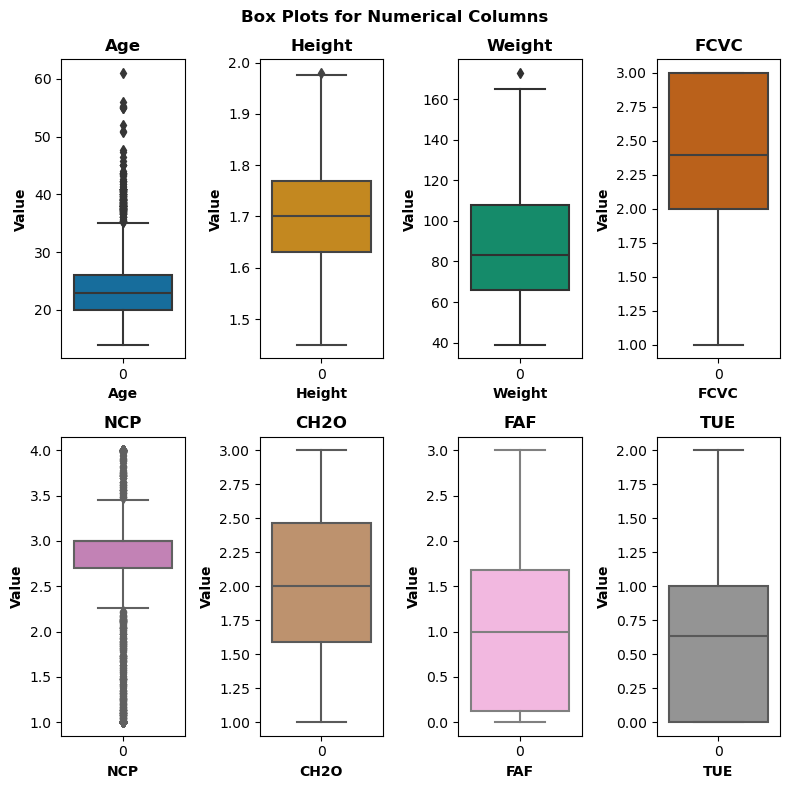

In [6]:
#Finding Potential Outliers
#Box plots for Numerical Features

fig, axes_array = plt.subplots(2,4,figsize=(8,8))

axes_list = axes_array.flatten()
color_list = sns.color_palette('colorblind',n_colors=len(numerical_data))
for col, ax, color in zip(numerical_data,axes_list,color_list):
    sns.boxplot(data=Obesity_data[col],ax=ax,color=color)
    ax.set_title(f"{col}", fontweight='bold')
    ax.set_xlabel(col, fontweight='bold')
    ax.set_ylabel("Value", fontweight='bold')
    
fig.suptitle("Box Plots for Numerical Columns", fontweight='bold')
plt.tight_layout()
plt.show()

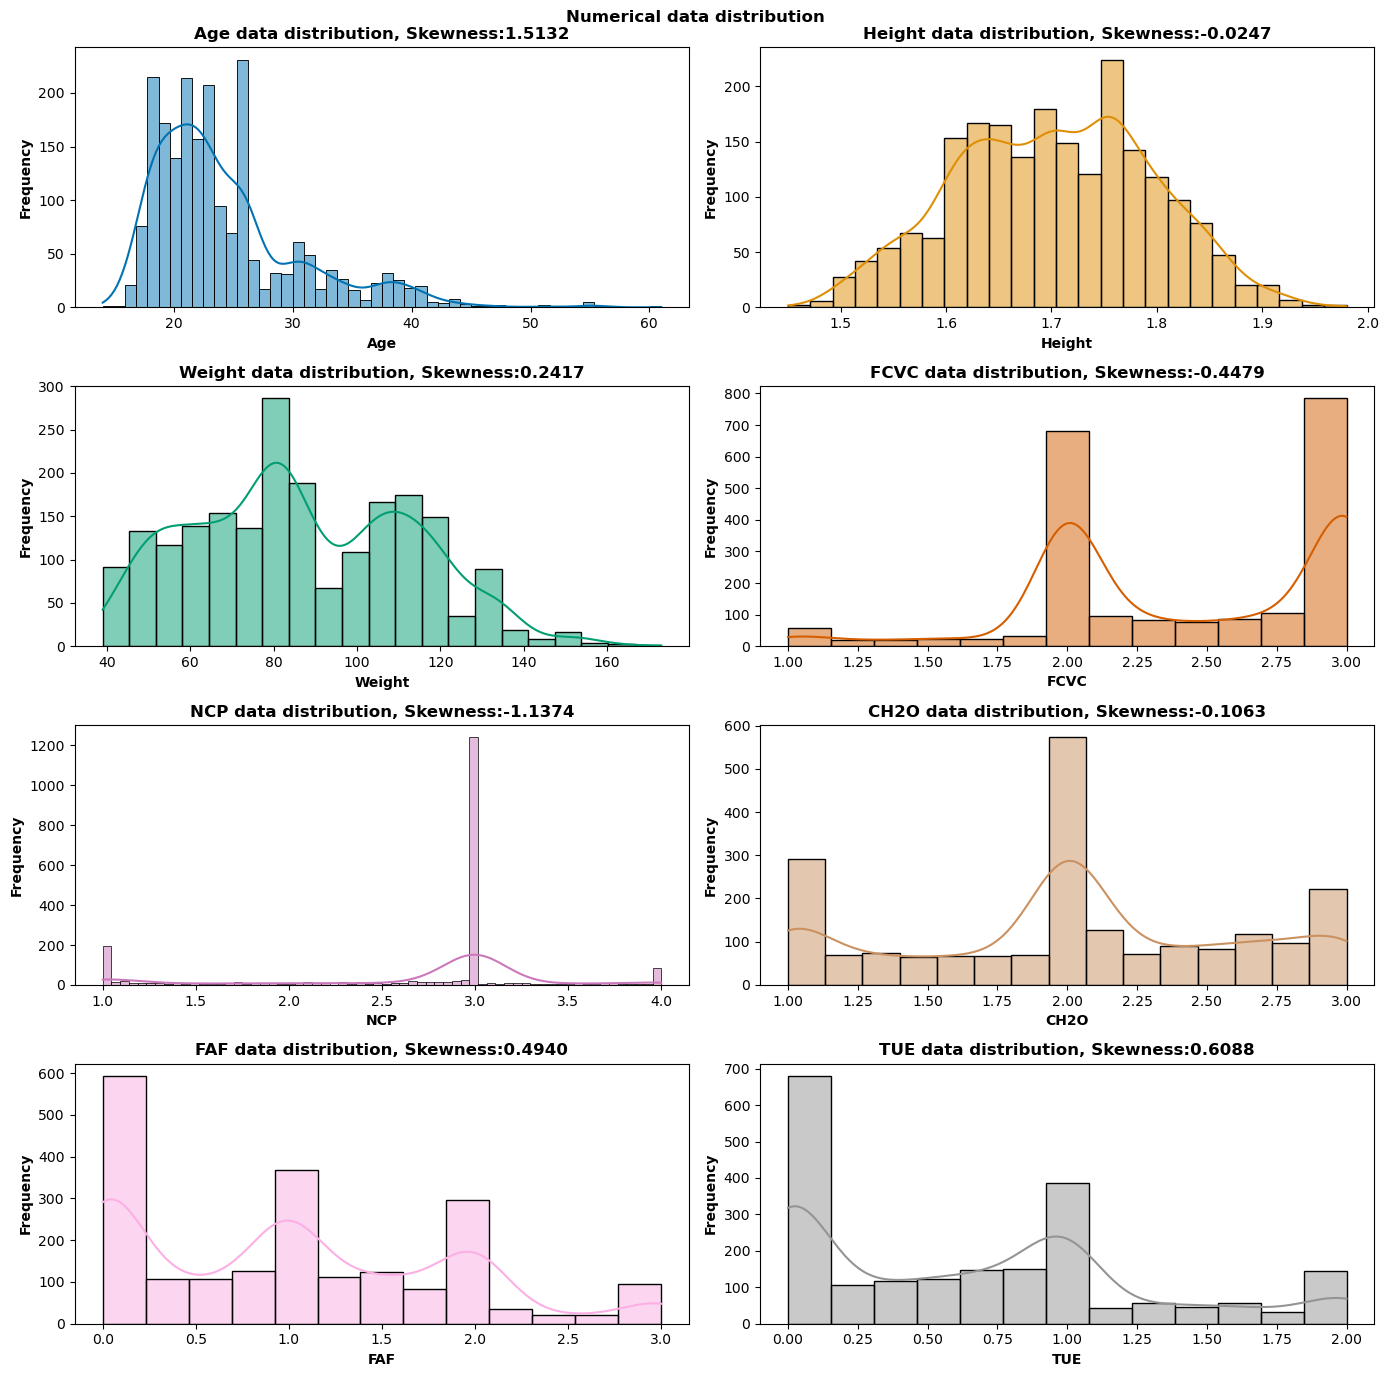

In [7]:
#Historgram to see the distribution of numerical data
fig, axes_array = plt.subplots(4,2,figsize=(14,14))

axes_list = axes_array.flatten()
color_list = sns.color_palette('colorblind',n_colors=len(numerical_data))
for col, ax, color in zip(numerical_data,axes_list,color_list):
    sns.histplot(x=Obesity_data[col],ax=ax,color=color,kde=True)
    skewness = stats.skew(Obesity_data[col])
    ax.set_title(f"{col} data distribution, Skewness:{skewness:.4f}", fontweight='bold')
    ax.set_xlabel(col, fontweight='bold')
    ax.set_ylabel("Frequency", fontweight='bold')
    
fig.suptitle("Numerical data distribution", fontweight='bold')
plt.tight_layout()
plt.show()

In [8]:
#Summary Statistics
numerical_data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035
std,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000
50%,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


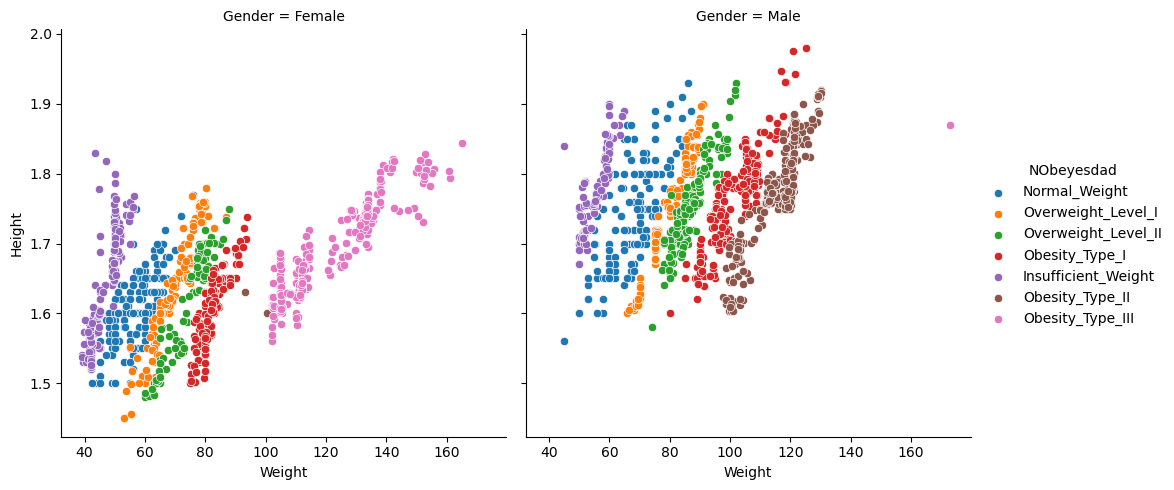

In [9]:
#Relationship between Some Important Features
#Group Scatterplot showing Relationship Between Weight and Height Group by Gender, Colored by Obesity Level
g = sns.FacetGrid(Obesity_data, col="Gender", hue="NObeyesdad", height=5)
g.map(sns.scatterplot, "Weight", "Height")
g.add_legend()
plt.show()

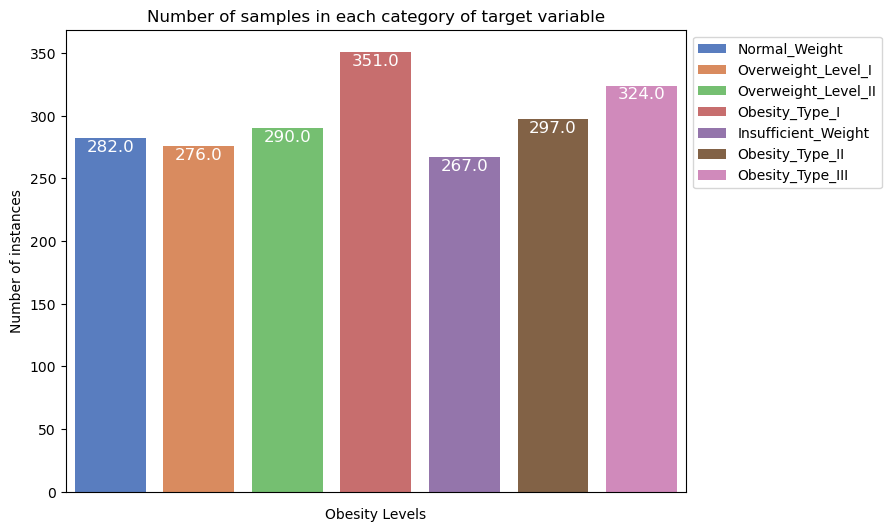

NObeyesdad
Normal_Weight          282
Overweight_Level_I     276
Overweight_Level_II    290
Obesity_Type_I         351
Insufficient_Weight    267
Obesity_Type_II        297
Obesity_Type_III       324
Name: count, dtype: int64


In [10]:
#Plotting numbers of samples in each category of Target Variable
obesity_level_counts = Obesity_data['NObeyesdad'].value_counts(sort=False)
plt.figure(figsize=(8, 6))
ax = sns.countplot(x="NObeyesdad", hue="NObeyesdad",data=Obesity_data,dodge=False, palette="muted")
plt.title("Number of samples in each category of target variable")
plt.ylabel("Number of instances")
plt.xlabel("Obesity Levels")

plt.tick_params(bottom = False)
plt.gca().set_xticklabels([])

ax.legend(loc=2,bbox_to_anchor=(1, 1)) 

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='center', color='white', size=12)

plt.show()
print(obesity_level_counts)

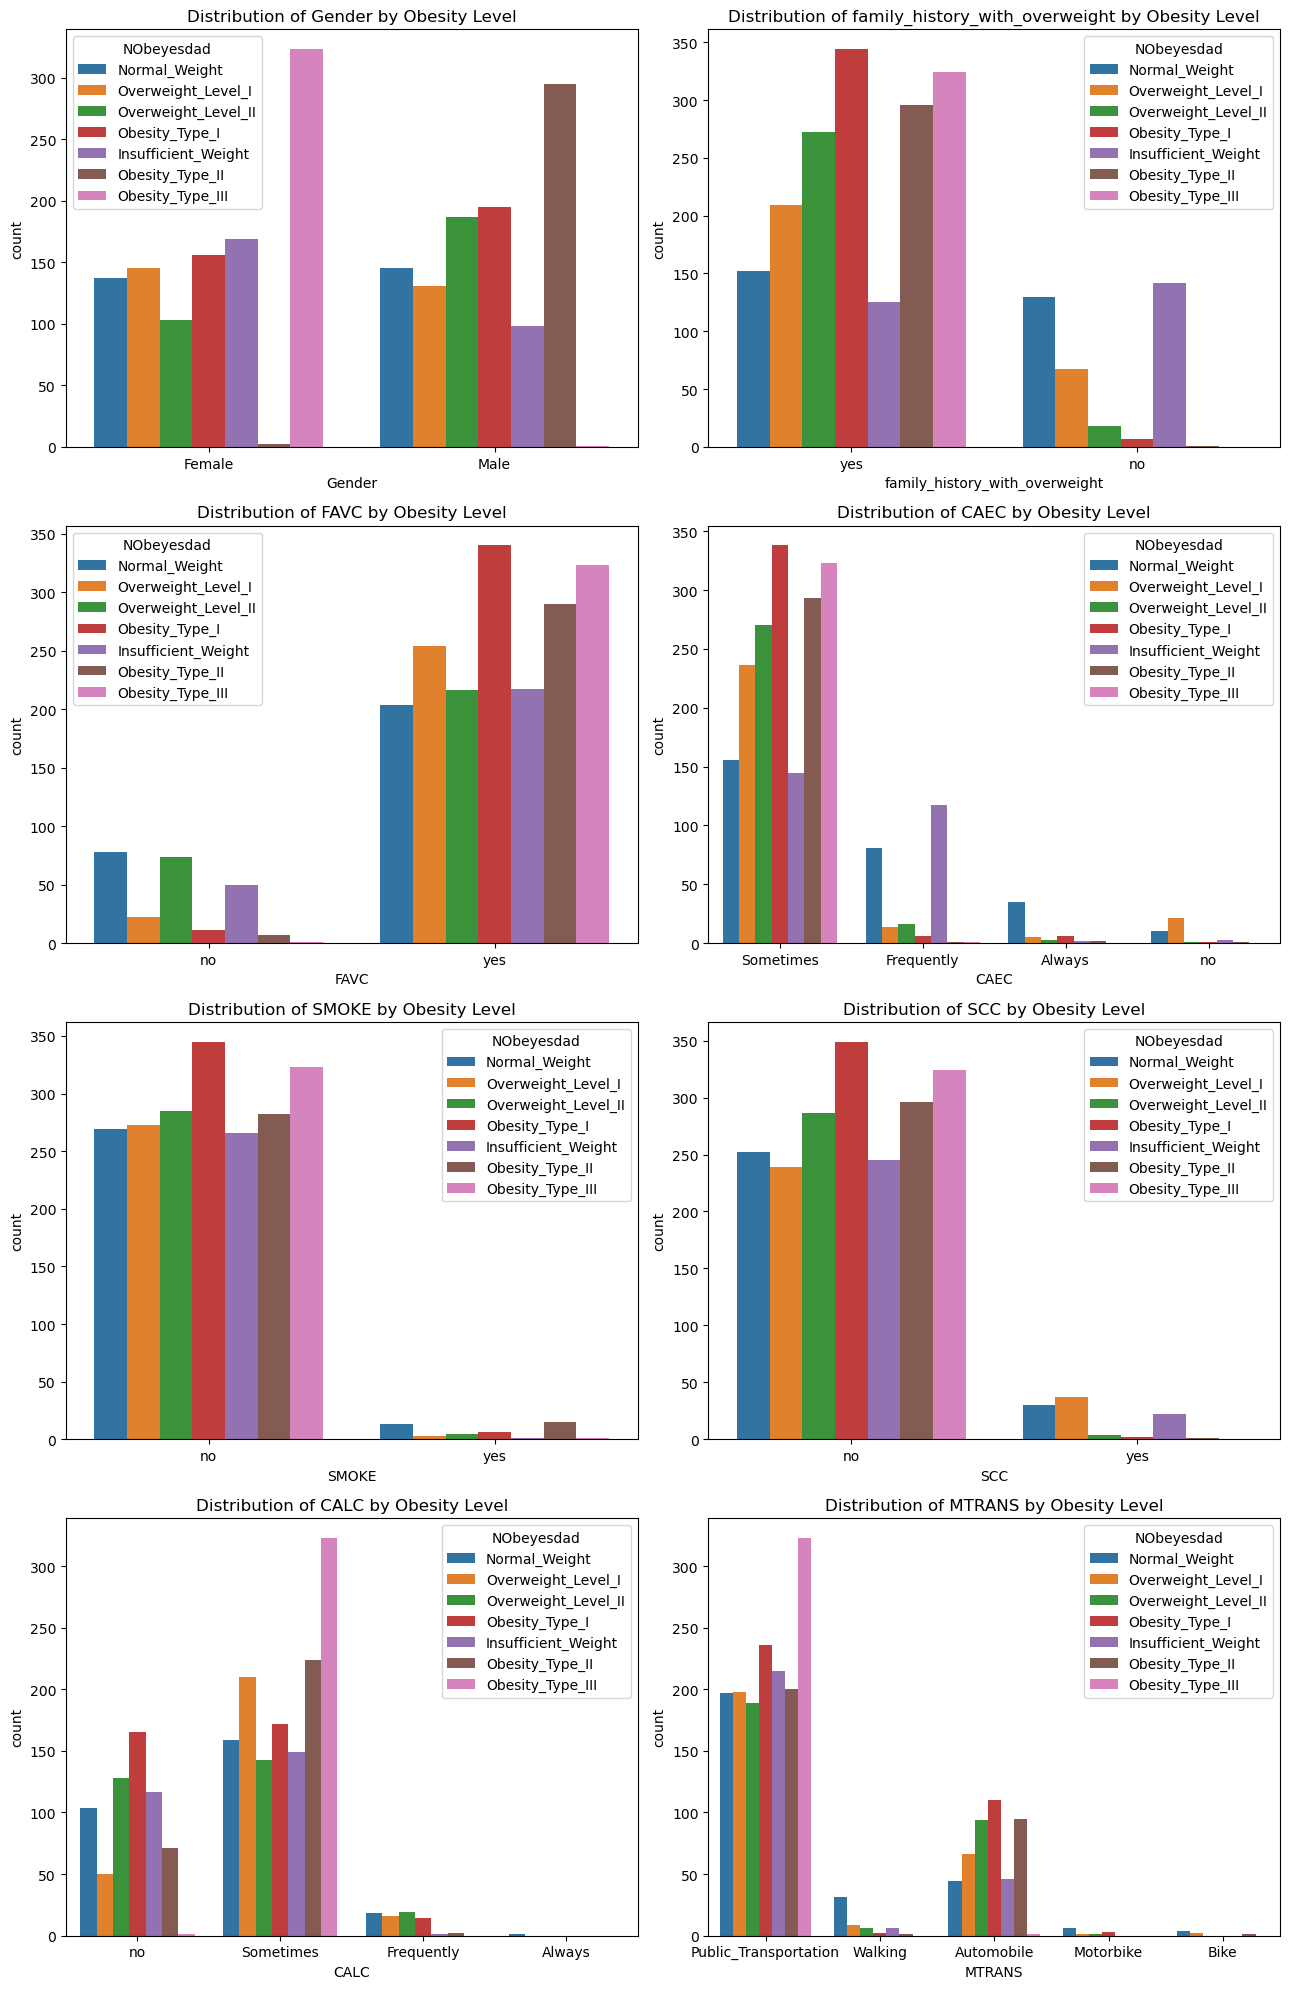

In [11]:
#Relationship between Categorical Data and Target Class
categorical_data = Obesity_data.select_dtypes(include="object")
categorical_data = categorical_data.drop(columns=["NObeyesdad"])
fig, axes = plt.subplots(4, 2, figsize=(13, 20))
axes = axes.flatten()
for ax, x in zip(axes, categorical_data):
    sns.countplot(data=Obesity_data, x=x, hue='NObeyesdad', ax=ax)
    ax.set_title(f"Distribution of {x} by Obesity Level")

plt.tight_layout()
plt.show()

In [12]:
#Encoding and Spliting dataset into Train / Test datasets
nrow, ncol = Obesity_data.shape
predictors = Obesity_data.iloc[:, :ncol-1]
target = Obesity_data.iloc[:, -1]
encoder = ce.OrdinalEncoder(cols=categorical_data.columns)
predictors_encoded = encoder.fit_transform(predictors)
X_train, X_test, y_train, y_test = train_test_split(predictors_encoded, target,  test_size=.3)

Number of tree nodes for base model:  215


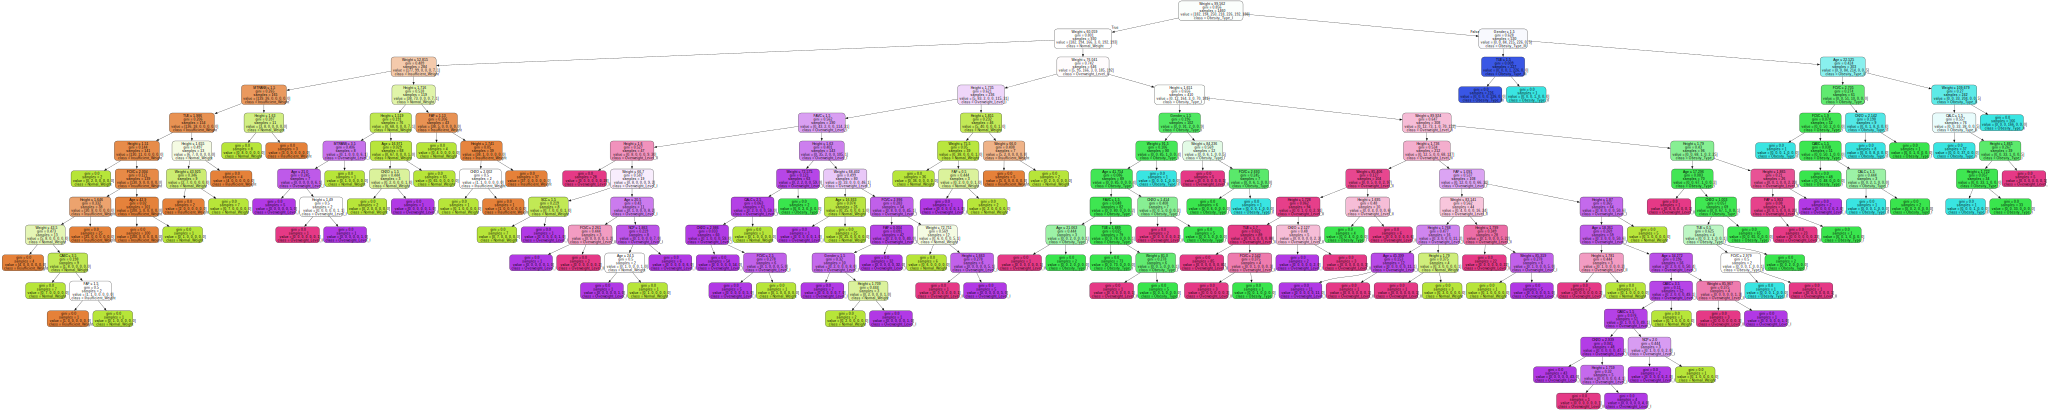

In [13]:
#BaseLine Decision Tree Classifier (Default parameter)
base_dt = tree.DecisionTreeClassifier(random_state=47)
base_dt_fit = base_dt.fit(X_train,y_train)

dot_data = tree.export_graphviz(base_dt_fit, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=base_dt.classes_,  
                              filled=True, rounded=True,  
                              special_characters=True)

mygini_visgraph_base = graphviz.Source(dot_data) 
print('Number of tree nodes for base model: ', base_dt_fit.tree_.node_count)
mygini_visgraph_base

[[80  5  0  0  0  0  0]
 [ 5 72  0  0  0 11  0]
 [ 0  0 94  2  0  0  5]
 [ 0  0  2 77  0  0  0]
 [ 0  0  0  1 97  0  0]
 [ 0  6  0  0  0 71  7]
 [ 0  0  3  0  0  7 82]]


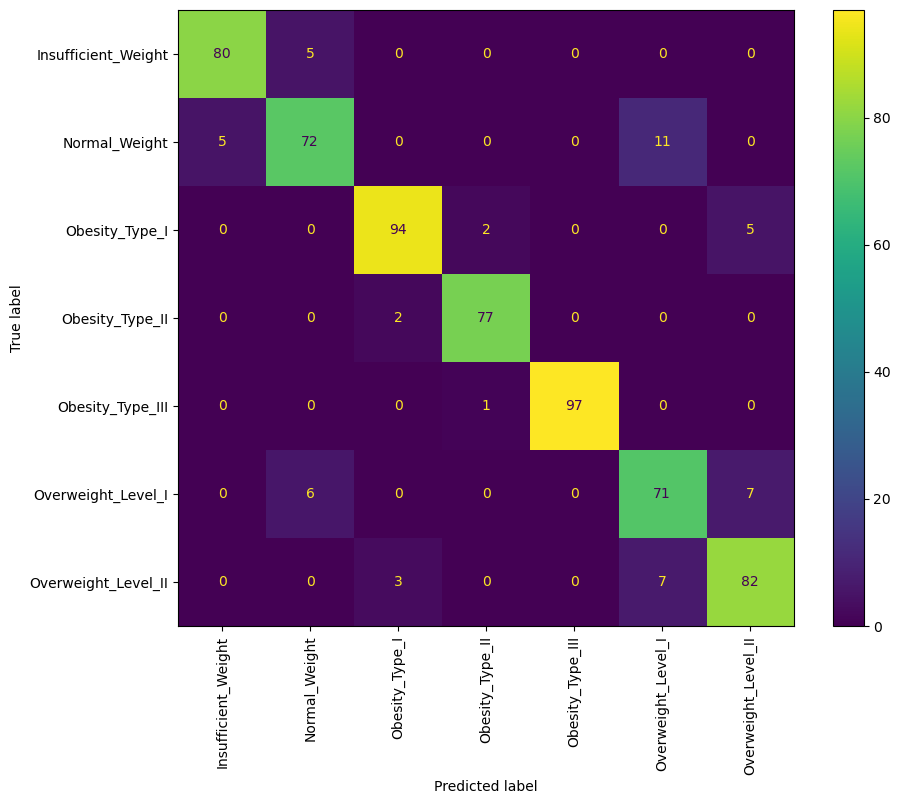

In [14]:
#Confusion Matrix for Baseline Model
y_predict_base = base_dt_fit.predict(X_test)
cm_base = confusion_matrix(y_test, y_predict_base, labels=base_dt.classes_)
print(cm_base)
fig, ax = plt.subplots(figsize=(10, 8))  

c = ConfusionMatrixDisplay(confusion_matrix = cm_base, display_labels = base_dt.classes_)

c.plot(ax=ax)  
plt.xticks(rotation=90)

plt.show()

In [15]:
#Ev
print(classification_report(y_test, y_predict_base, target_names=base_dt.classes_))

                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.94      0.94        85
      Normal_Weight       0.87      0.82      0.84        88
     Obesity_Type_I       0.95      0.93      0.94       101
    Obesity_Type_II       0.96      0.97      0.97        79
   Obesity_Type_III       1.00      0.99      0.99        98
 Overweight_Level_I       0.80      0.85      0.82        84
Overweight_Level_II       0.87      0.89      0.88        92

           accuracy                           0.91       627
          macro avg       0.91      0.91      0.91       627
       weighted avg       0.91      0.91      0.91       627



max_depth=1 Average 10-Fold CV Score:0.2918062200956938 Node count:3
max_depth=2 Average 10-Fold CV Score:0.5534343945528156 Node count:7
max_depth=3 Average 10-Fold CV Score:0.6277281928597718 Node count:15
max_depth=4 Average 10-Fold CV Score:0.7695666175929334 Node count:27
max_depth=5 Average 10-Fold CV Score:0.823237946264262 Node count:49
max_depth=6 Average 10-Fold CV Score:0.8759339344865662 Node count:79
max_depth=7 Average 10-Fold CV Score:0.8840725064409275 Node count:113
max_depth=8 Average 10-Fold CV Score:0.9238406330511593 Node count:145
max_depth=9 Average 10-Fold CV Score:0.9276821862348179 Node count:173
max_depth=10 Average 10-Fold CV Score:0.9305506993006991 Node count:199
max_depth=11 Average 10-Fold CV Score:0.9291175929333824 Node count:207
max_depth=12 Average 10-Fold CV Score:0.9295983621641517 Node count:209
max_depth=13 Average 10-Fold CV Score:0.9310337688627163 Node count:213
max_depth=14 Average 10-Fold CV Score:0.9295983621641517 Node count:215
max_depth=

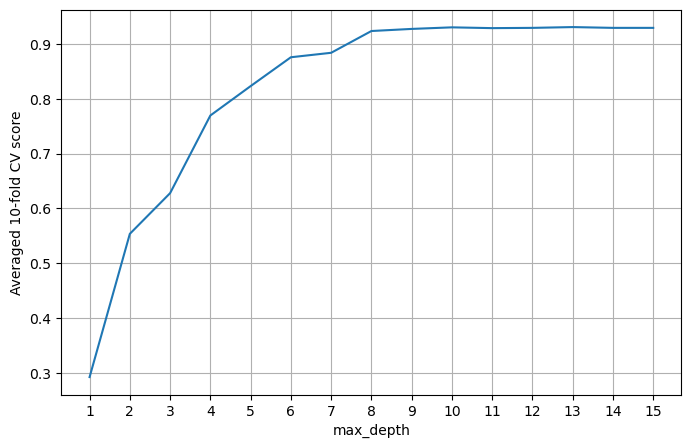

In [16]:
#Tune 'max_depth' parameter.

maxdepth_cv=[]
node_counts=[]
max_cv_score = 0
max_score_depth = 0
for k in range(1,16,1):
    dt=DecisionTreeClassifier(max_depth=k,random_state=47)
    dt.fit(X_train,y_train)
    predict=dt.predict(X_test)
    cv= cross_val_score(dt,predictors_encoded,target,cv=10)
    nodecount = dt.tree_.node_count
    print("max_depth={}".format(k), "Average 10-Fold CV Score:{}".format(np.mean(cv)),
          "Node count:{}".format(nodecount))
    if np.mean(cv) > max_cv_score:
        max_cv_score = np.mean(cv)
        max_score_depth = k
    maxdepth_cv.append(np.mean(cv))
    node_counts.append(nodecount)     

print("\nMaximum Average 10-Fold CV Score:", max_cv_score)
print("Max_leaf_node with max_cv_score:", max_score_depth)
#Plot averaged CV scores for all max_depth tunings
fig,axes=plt.subplots(1,1,figsize=(8,5))
axes.set_xticks(range(1,16,1))
k=range(1,16,1)
plt.plot(k,maxdepth_cv)
plt.xlabel("max_depth")
plt.ylabel("Averaged 10-fold CV score")
plt.grid()
plt.show()

Number of tree nodes after tuning max-depth:  213


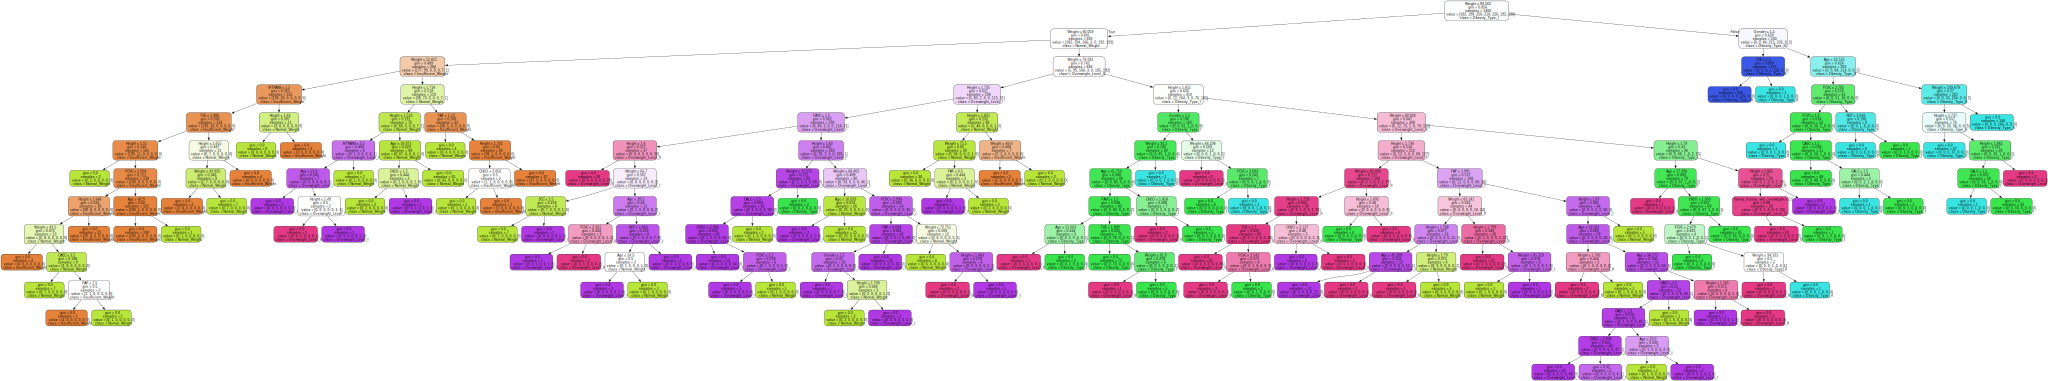

In [17]:
#Decision Tree After Tuning Max Depth 

depth_dt=DecisionTreeClassifier(max_depth=13, random_state=47)
depth_dt_fit=depth_dt.fit(X_train,y_train)
dot_data = tree.export_graphviz(depth_dt_fit, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=depth_dt.classes_,  
                              filled=True, rounded=True,  
                              special_characters=True)

mygini_visgraph_depth = graphviz.Source(dot_data) 
print('Number of tree nodes after tuning max-depth: ', depth_dt_fit.tree_.node_count)
mygini_visgraph_depth

[[80  5  0  0  0  0  0]
 [ 5 72  0  0  0 11  0]
 [ 0  0 94  2  0  0  5]
 [ 0  0  3 76  0  0  0]
 [ 0  0  1  0 97  0  0]
 [ 0  6  0  0  0 71  7]
 [ 0  0  2  0  0  8 82]]


**Confusion Matrix After Tuning Maximum Depth**

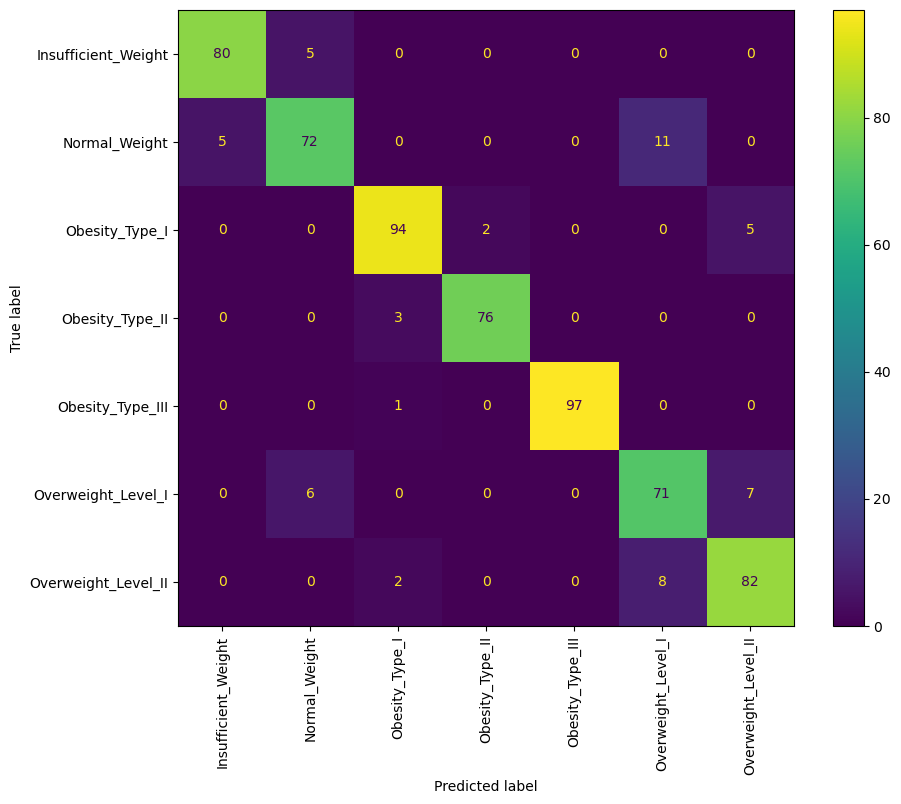

In [18]:
#Confusion Matrix After Tuning Maximum Depth
y_predict_depth = depth_dt_fit.predict(X_test)
cm_depth = confusion_matrix(y_test, y_predict_depth, labels=depth_dt.classes_)
print(cm_depth)
fig, ax = plt.subplots(figsize=(10, 8))  
display(Markdown("**Confusion Matrix After Tuning Maximum Depth**"))
c = ConfusionMatrixDisplay(confusion_matrix = cm_depth, display_labels = depth_dt.classes_)

c.plot(ax=ax)  
plt.xticks(rotation=90)

plt.show()

In [19]:
#Classification Results after Tuning Max Depth
print(classification_report(y_test, y_predict_depth, target_names=depth_dt.classes_))

                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.94      0.94        85
      Normal_Weight       0.87      0.82      0.84        88
     Obesity_Type_I       0.94      0.93      0.94       101
    Obesity_Type_II       0.97      0.96      0.97        79
   Obesity_Type_III       1.00      0.99      0.99        98
 Overweight_Level_I       0.79      0.85      0.82        84
Overweight_Level_II       0.87      0.89      0.88        92

           accuracy                           0.91       627
          macro avg       0.91      0.91      0.91       627
       weighted avg       0.91      0.91      0.91       627



max_leaf_nodes=2 Average 10-Fold CV Score:0.2918062200956938 Node count:3
max_leaf_nodes=3 Average 10-Fold CV Score:0.4293338240706662 Node count:5
max_leaf_nodes=4 Average 10-Fold CV Score:0.5534343945528156 Node count:7
max_leaf_nodes=5 Average 10-Fold CV Score:0.5999056864188443 Node count:9
max_leaf_nodes=6 Average 10-Fold CV Score:0.6669925469267574 Node count:11
max_leaf_nodes=7 Average 10-Fold CV Score:0.6799434118513066 Node count:13
max_leaf_nodes=8 Average 10-Fold CV Score:0.6933842473316157 Node count:15
max_leaf_nodes=9 Average 10-Fold CV Score:0.7149268494663231 Node count:17
max_leaf_nodes=10 Average 10-Fold CV Score:0.7331316709606182 Node count:19
max_leaf_nodes=11 Average 10-Fold CV Score:0.7537472396025028 Node count:21
max_leaf_nodes=12 Average 10-Fold CV Score:0.7829614464482886 Node count:23
max_leaf_nodes=13 Average 10-Fold CV Score:0.8083594037541406 Node count:25
max_leaf_nodes=14 Average 10-Fold CV Score:0.8241833824070666 Node count:27
max_leaf_nodes=15 Averag

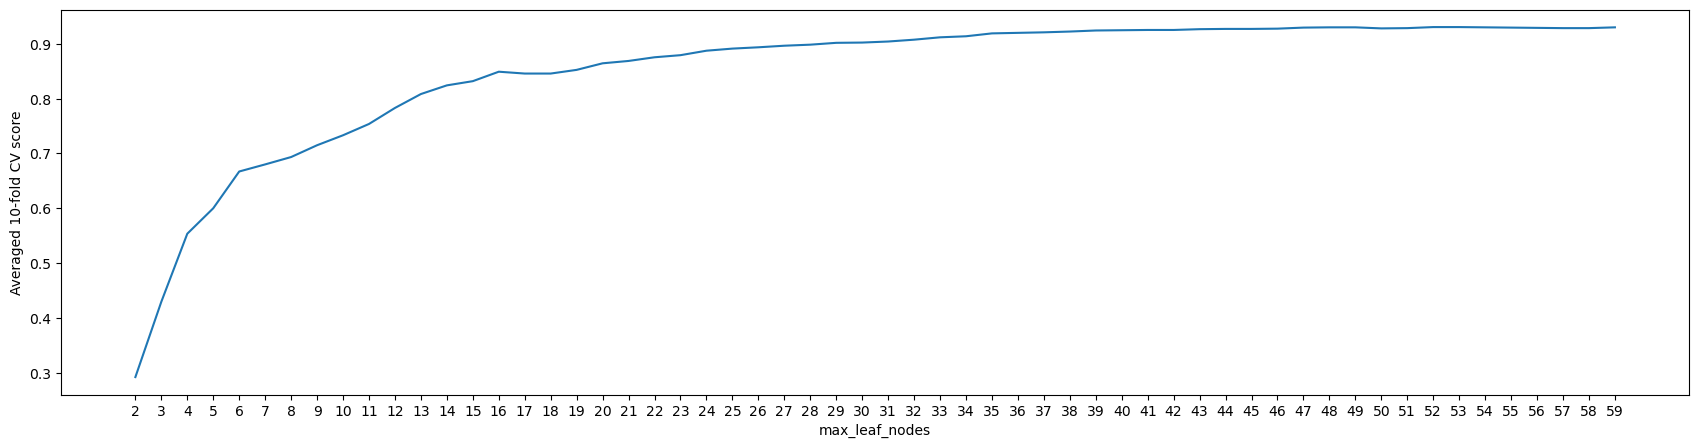

In [20]:
#Tuning Max Leaf Node
maxleafnodes_cv=[]
node_counts1=[]
max_cv_score = 0
max_score_leaf_node = 0
for k in range(2,60,1):
    dt=DecisionTreeClassifier(max_depth=13, max_leaf_nodes=k, random_state=47)
    dt.fit(X_train,y_train)
    predict=dt.predict(X_test)
    cv= cross_val_score(dt,predictors_encoded,target,cv=10)
    nodecount = dt.tree_.node_count
    print("max_leaf_nodes={}".format(k), "Average 10-Fold CV Score:{}".format(np.mean(cv)),
          "Node count:{}".format(nodecount))
    if np.mean(cv) > max_cv_score:
        max_cv_score = np.mean(cv)
        max_score_leaf_node = k
    maxleafnodes_cv.append(np.mean(cv))
    node_counts1.append(nodecount)     
#Plot averaged CV scores for all max_leaf_nodes tunings

print("\nMaximum Average 10-Fold CV Score:", max_cv_score)
print("Max_leaf_node with max_cv_score:", max_score_leaf_node)
fig,axes=plt.subplots(1,1,figsize=(21,5))
axes.set_xticks(range(2,60,1))
k=range(2,60,1)
plt.plot(k,maxleafnodes_cv)
plt.xlabel("max_leaf_nodes")
plt.ylabel("Averaged 10-fold CV score")
plt.show()

Number of tree nodes:  103


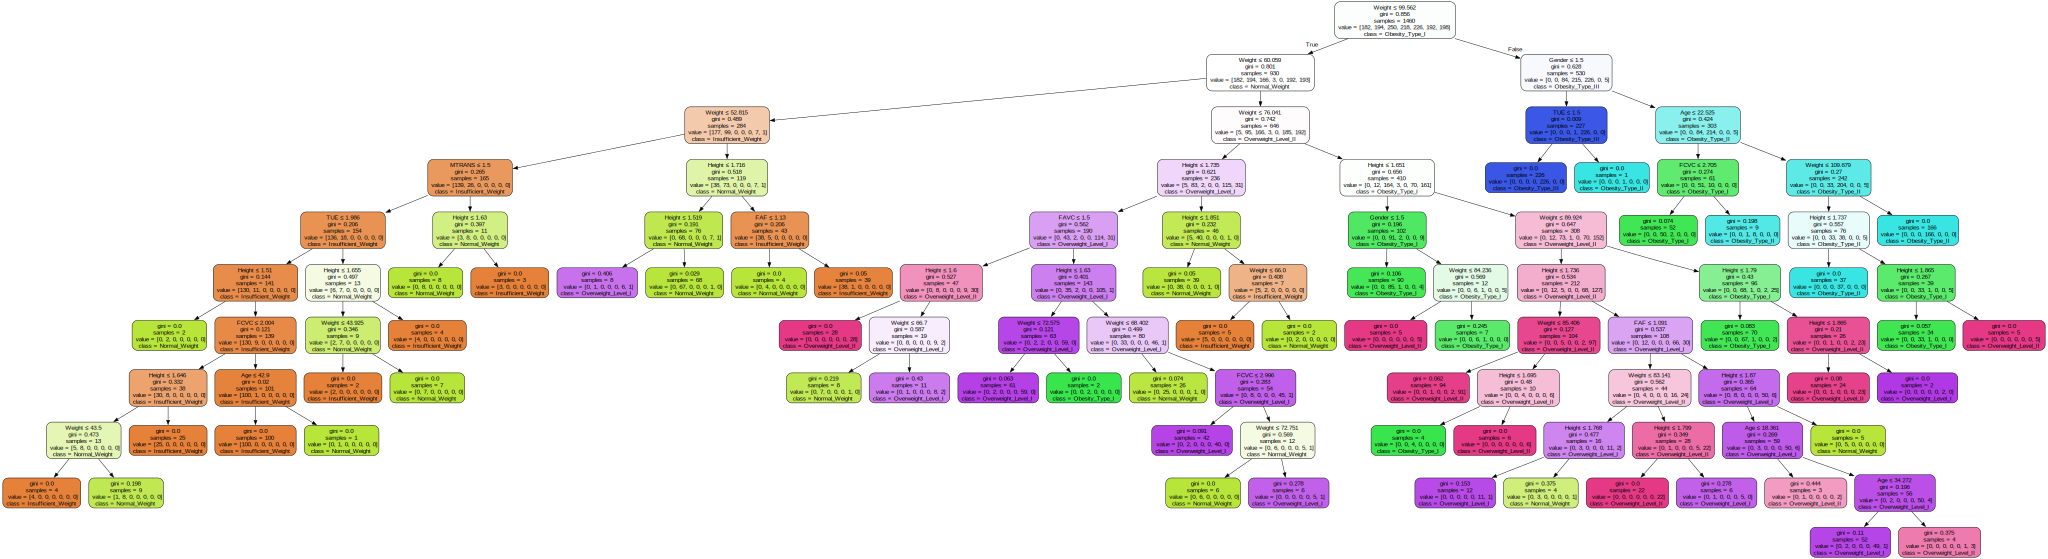

In [21]:
#Final Decision Tree Model
opt_dt=DecisionTreeClassifier(max_depth=13, max_leaf_nodes=52,random_state=47)
opt_dt_fit=opt_dt.fit(X_train,y_train)

dot_data = tree.export_graphviz(opt_dt_fit, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=base_dt.classes_,  
                              filled=True, rounded=True,  
                              special_characters=True)

mygini_visgraph_final = graphviz.Source(dot_data) 
print('Number of tree nodes: ', opt_dt_fit.tree_.node_count)
mygini_visgraph_final

[[82  3  0  0  0  0  0]
 [ 6 71  0  0  0 11  0]
 [ 0  0 97  1  0  0  3]
 [ 0  0  6 73  0  0  0]
 [ 0  0  0  1 97  0  0]
 [ 0  5  0  0  0 71  8]
 [ 0  0  3  0  0  8 81]]


**Confusion Matrix After Tuning Maximum Depth and Maximum Leaf Nodes**

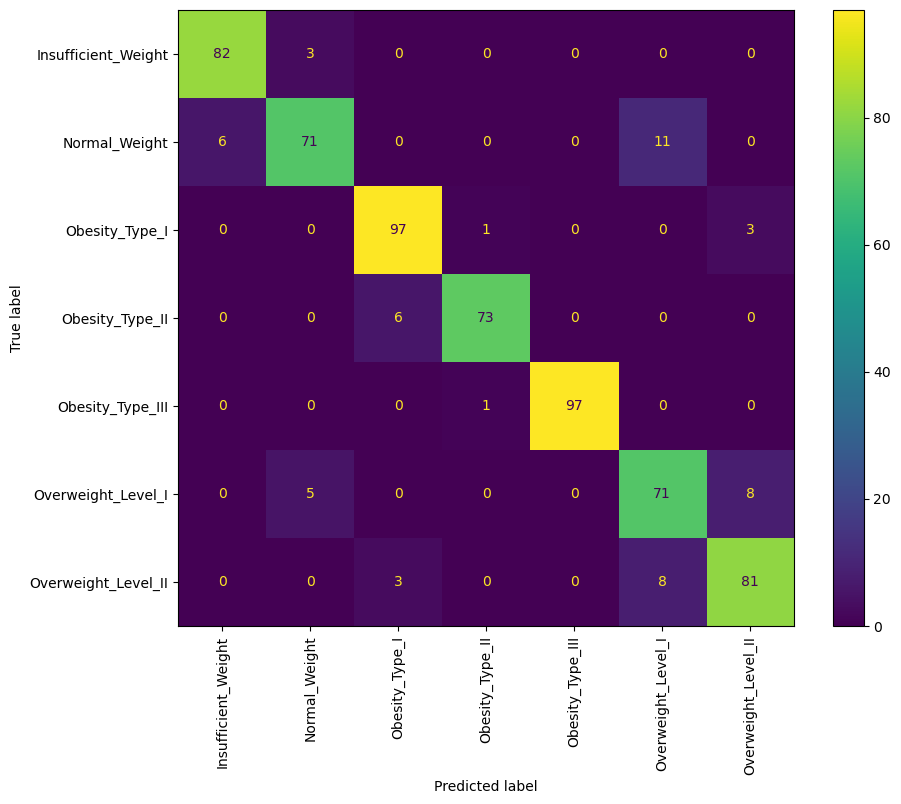

In [22]:
#Confusion Matrix for Final Model
y_predict_final =opt_dt_fit.predict(X_test)
cm = confusion_matrix(y_test, y_predict_final, labels=opt_dt.classes_)
print(cm)
fig, ax = plt.subplots(figsize=(10, 8))  
display(Markdown("**Confusion Matrix After Tuning Maximum Depth and Maximum Leaf Nodes**"))
c = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = opt_dt.classes_)

c.plot(ax=ax)  
plt.xticks(rotation=90)

plt.show()

In [23]:
#Classification Report for Final Model
print(classification_report(y_test, y_predict_final, target_names=opt_dt.classes_))

                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.96      0.95        85
      Normal_Weight       0.90      0.81      0.85        88
     Obesity_Type_I       0.92      0.96      0.94       101
    Obesity_Type_II       0.97      0.92      0.95        79
   Obesity_Type_III       1.00      0.99      0.99        98
 Overweight_Level_I       0.79      0.85      0.82        84
Overweight_Level_II       0.88      0.88      0.88        92

           accuracy                           0.91       627
          macro avg       0.91      0.91      0.91       627
       weighted avg       0.91      0.91      0.91       627



In [24]:
#Feature Importance
importances = pd.DataFrame({'Feature':predictors.columns,'Importance':np.round(opt_dt.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False)
importances

,Feature,Importance
3,Weight,0.447
2,Height,0.267
0,Gender,0.176
1,Age,0.047
5,FAVC,0.021
6,FCVC,0.015
12,FAF,0.014
15,MTRANS,0.007
13,TUE,0.006
4,family_history_with_overweight,0.000
